# Exploratory Data Analysis Of Data Science Job Salaries

In [43]:
# ignore warnings
import warnings

warnings.filterwarnings("ignore")

import pandas as pd

pd.options.display.float_format = '{:,}'.format

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "svg"

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [44]:
data = pd.read_csv("datasets/ds_salaries.csv")

# drop redundant columns
data = data.drop(["Unnamed: 0", "salary", "salary_currency"], axis=1)

for i, xp in enumerate(data['experience_level']):
    if data['experience_level'][i] == 'EN':
        data['experience_level'][i] = 'Entry Level'
    elif data['experience_level'][i] == 'MI':
        data['experience_level'][i] = 'Mid Level'
    elif data['experience_level'][i] == 'SE':
        data['experience_level'][i] = 'Senior Level'
    else:
        data['experience_level'][i] = 'Executive Level'

for i, emp in enumerate(data['employment_type']):
    if data['employment_type'][i] == "CT":
        data['employment_type'][i] = "Contract"
    elif data['employment_type'][i] == "FT":
        data['employment_type'][i] = "Full-time"
    elif data['employment_type'][i] == "FL":
        data['employment_type'][i] = "Freelance"
    else:
        data['employment_type'][i] = "Part-time"
    
for i, size in enumerate(data['company_size']):
    if data['company_size'][i] == "L":
        data['company_size'][i] = "Large"
    elif data['company_size'][i] == "M":
        data['company_size'][i] = "Medium"
    else:
        data['company_size'][i] = "Small"
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid Level,Full-time,Data Scientist,79833,DE,0,DE,Large
1,2020,Senior Level,Full-time,Machine Learning Scientist,260000,JP,0,JP,Small
2,2020,Senior Level,Full-time,Big Data Engineer,109024,GB,50,GB,Medium
3,2020,Mid Level,Full-time,Product Data Analyst,20000,HN,0,HN,Small
4,2020,Senior Level,Full-time,Machine Learning Engineer,150000,US,50,US,Large
...,...,...,...,...,...,...,...,...,...
602,2022,Senior Level,Full-time,Data Engineer,154000,US,100,US,Medium
603,2022,Senior Level,Full-time,Data Engineer,126000,US,100,US,Medium
604,2022,Senior Level,Full-time,Data Analyst,129000,US,0,US,Medium
605,2022,Senior Level,Full-time,Data Analyst,150000,US,100,US,Medium


In [45]:
data.shape

(607, 9)

- The dataset contains 607 columns and 9 rows

### What data type is contained in the dataset?

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


- The dataset indicates that we've got 3 numerical and 6 categorical variables.

### Are there null values?

In [47]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

- Data is clean. No missing values.

## How many jobs are in the dataset?

In [48]:
jobs = data["job_title"].unique()
jobs

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

- There are 50 data professions in the dataset

## Univariate Analysis

### What are the top job titles?

In [49]:
job_title = data.groupby("job_title").size().reset_index().sort_values(by=0, ascending=False).head(10)
job_title = job_title.rename(columns={0:"count"})
job_title

,job_title,count
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
25,Director of Data Science,7


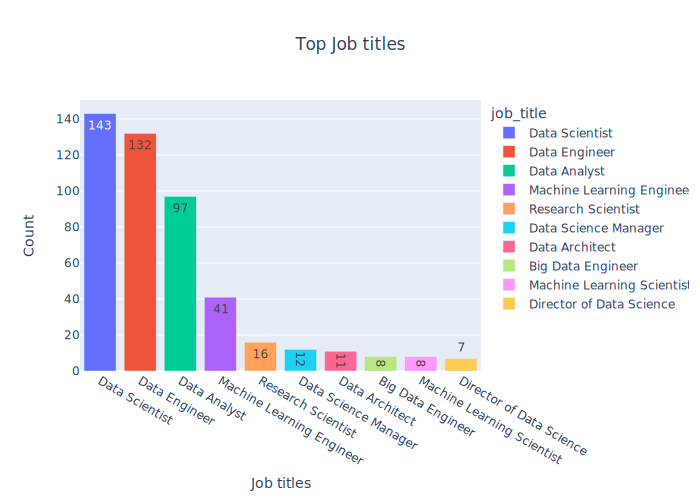

In [50]:
fig = px.bar(job_title, x="job_title", y="count", 
                color="job_title", title="Top Job titles", 
                text="count").update_layout(xaxis_title="Job titles", yaxis_title="Count", title_x=0.5)
fig

- We've got more `data scientists`, followed by `data engineers` and `analysts`.

### Which data profession were the highest and lowest earners from 2020-2022?

#### For 2020

In [51]:
highest_2020 = (data[data.work_year == 2020].groupby(["job_title", "experience_level", "company_size", "company_location"]).max()['salary_in_usd'].reset_index()
                                    ).sort_values(["salary_in_usd"], ascending=False).head(10)
highest_2020

,job_title,experience_level,company_size,company_location,salary_in_usd
65,Research Scientist,Mid Level,Medium,US,450000
44,Data Scientist,Senior Level,Large,US,412000
46,Director of Data Science,Executive Level,Large,US,325000
60,Machine Learning Scientist,Senior Level,Small,JP,260000
53,Machine Learning Engineer,Entry Level,Large,US,250000
28,Data Science Manager,Senior Level,Medium,US,190200
51,Lead Data Scientist,Senior Level,Small,US,190000
22,Data Engineer,Senior Level,Large,US,188000
56,Machine Learning Engineer,Senior Level,Large,US,150000
61,Principal Data Scientist,Senior Level,Medium,DE,148261


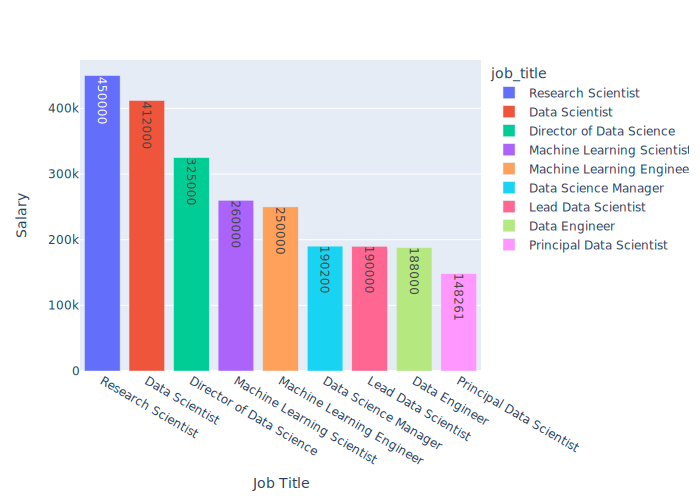

In [52]:
fig = px.bar(highest_2020.drop_duplicates(subset=["job_title"]), 
                            x="job_title", y="salary_in_usd", 
                            color="job_title", text="salary_in_usd").update_layout(xaxis_title="Job Title", yaxis_title="Salary")
fig

- In 2020, a `Research Scientist` working in the US with mid-level experience in a medium-sized company earned the highest.

In [53]:
lowest_2020 = (data[data.work_year == 2020].groupby(["job_title", "experience_level", "company_size", "company_location"]).max()['salary_in_usd'].reset_index()
                                    ).sort_values(["salary_in_usd"], ascending=True).head(10)
lowest_2020

,job_title,experience_level,company_size,company_location,salary_in_usd
26,Data Science Consultant,Entry Level,Medium,IN,5707
9,Data Analyst,Entry Level,Small,IN,6072
62,Product Data Analyst,Mid Level,Large,IN,6072
12,Data Analyst,Mid Level,Large,PK,8000
10,Data Analyst,Entry Level,Small,NG,10000
52,ML Engineer,Entry Level,Small,DE,15966
63,Product Data Analyst,Mid Level,Small,HN,20000
32,Data Scientist,Entry Level,Small,IT,21669
23,Data Engineer,Senior Level,Small,MX,33511
35,Data Scientist,Mid Level,Large,HU,35735


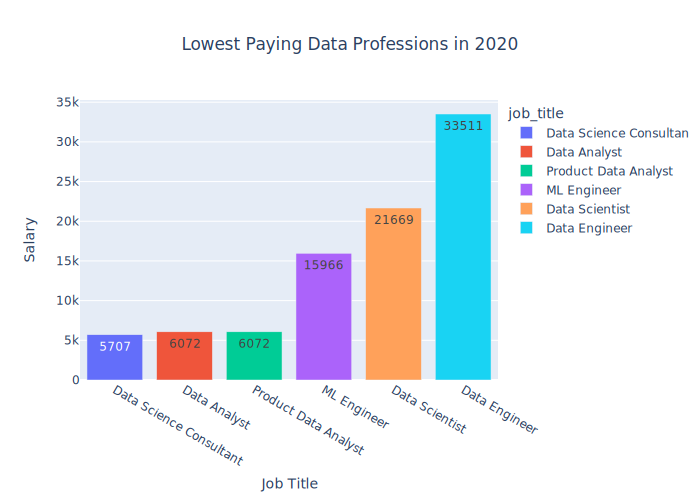

In [54]:
fig = (px.bar(lowest_2020.drop_duplicates(subset=["job_title"]), 
                                x="job_title", y="salary_in_usd", 
                                color="job_title", text="salary_in_usd", title="Lowest Paying Data Professions in 2020")
                                ).update_layout(xaxis_title="Job Title", yaxis_title="Salary", title_x=0.5)
fig

- In 2020, a `Data Science Consultant` working in India with entry level experience in a medium-sized company earned the least.

#### For 2021:

In [55]:
paying_2021 = (data[data.work_year == 2021].groupby(["job_title", "experience_level", "company_size", "company_location"]).max()["salary_in_usd"].reset_index()
                                    ).sort_values(["salary_in_usd"], ascending=False)
paying_2021                                    

,job_title,experience_level,company_size,company_location,salary_in_usd
151,Principal Data Engineer,Executive Level,Large,US,600000
113,Financial Data Analyst,Mid Level,Large,US,450000
7,Applied Machine Learning Scientist,Mid Level,Large,US,423000
154,Principal Data Scientist,Executive Level,Small,US,416000
121,Lead Data Engineer,Senior Level,Large,US,276000
...,...,...,...,...,...
15,Big Data Engineer,Entry Level,Large,CH,5882
0,3D Computer Vision Researcher,Mid Level,Medium,IN,5409
79,Data Scientist,Entry Level,Medium,VN,4000
53,Data Engineer,Mid Level,Medium,IR,4000


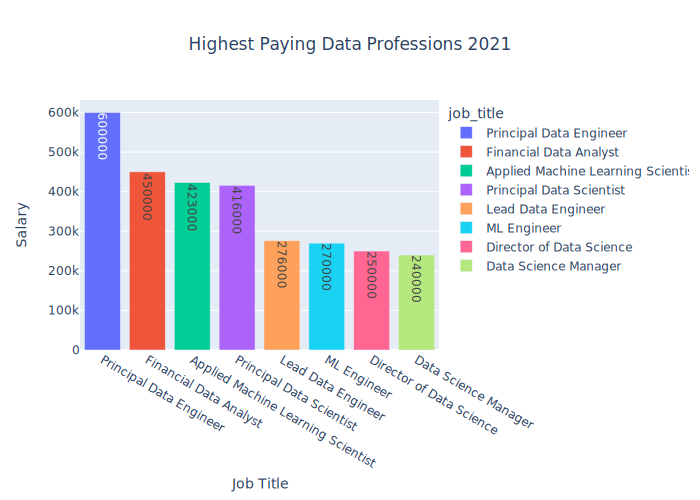

In [56]:
fig = (px.bar(paying_2021[:10].drop_duplicates(subset=["job_title"]), 
                            x="job_title", y="salary_in_usd", 
                            color="job_title", text="salary_in_usd", title="Highest Paying Data Professions 2021")
                            ).update_layout(xaxis_title="Job Title", yaxis_title="Salary", title_x=0.5)
fig

- In 2021, a `Principal Data Engineer` working in the US at an executive position in a large company earned the highest.

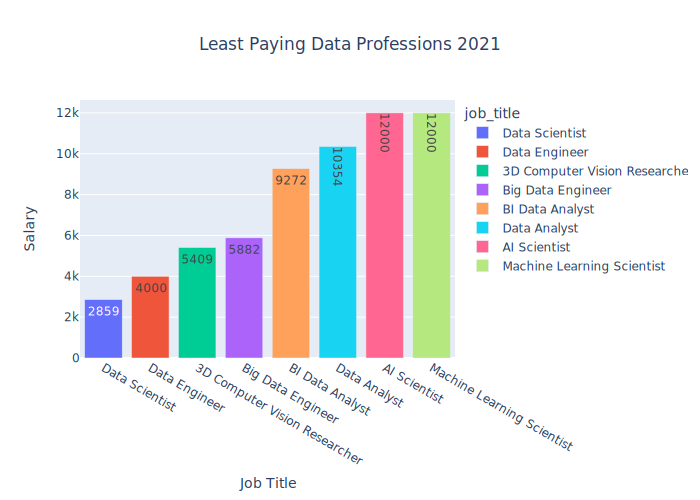

In [57]:
fig = (px.bar(paying_2021.sort_values(by="salary_in_usd", ascending=True)[:10].drop_duplicates(subset=["job_title"]), 
                            x="job_title", y="salary_in_usd", 
                            color="job_title", text="salary_in_usd", title="Least Paying Data Professions 2021")
                            ).update_layout(xaxis_title="Job Title", yaxis_title="Salary", title_x=0.5)
fig

- In 2021, a `Data Scientist` working in Mexico with at a mid-level position in a small company earned the lowest.

#### For 2022:

In [58]:
paying_2022 = (data[data.work_year == 2022].groupby(["job_title", "experience_level", "company_size", "company_location"]).max()["salary_in_usd"].reset_index()
                                    ).sort_values(["salary_in_usd"], ascending=False)
paying_2022                                    

,job_title,experience_level,company_size,company_location,salary_in_usd
25,Data Analytics Lead,Senior Level,Large,US,405000
5,Applied Data Scientist,Senior Level,Large,US,380000
33,Data Engineer,Executive Level,Medium,US,324000
28,Data Architect,Senior Level,Medium,US,266400
61,Data Scientist,Senior Level,Medium,US,260000
...,...,...,...,...,...
20,Data Analyst,Mid Level,Small,GR,20000
24,Data Analytics Engineer,Entry Level,Medium,PK,20000
9,Business Data Analyst,Mid Level,Medium,IN,18442
50,Data Scientist,Entry Level,Medium,IN,18442


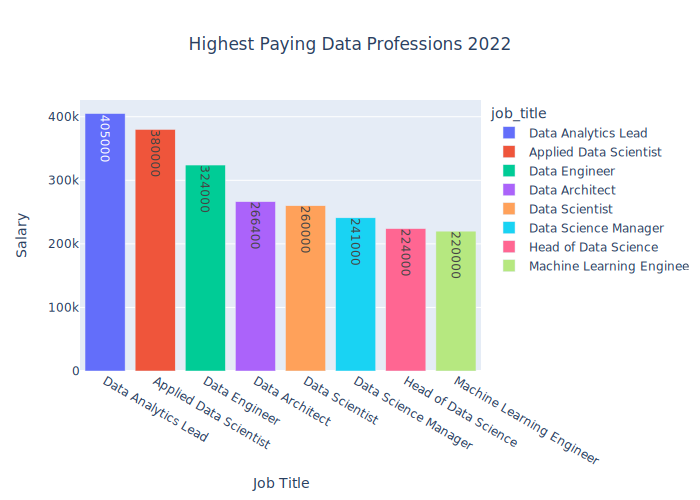

In [59]:
fig = (px.bar(paying_2022[:10].drop_duplicates(subset=["job_title"]), 
                            x="job_title", y="salary_in_usd", 
                            color="job_title", text="salary_in_usd", title="Highest Paying Data Professions 2022")
                            ).update_layout(xaxis_title="Job Title", yaxis_title="Salary", title_x=0.5)
fig

- In 2022, a `Data Analytics Lead` working in the US with senior-level experience in a large company earned the highest.

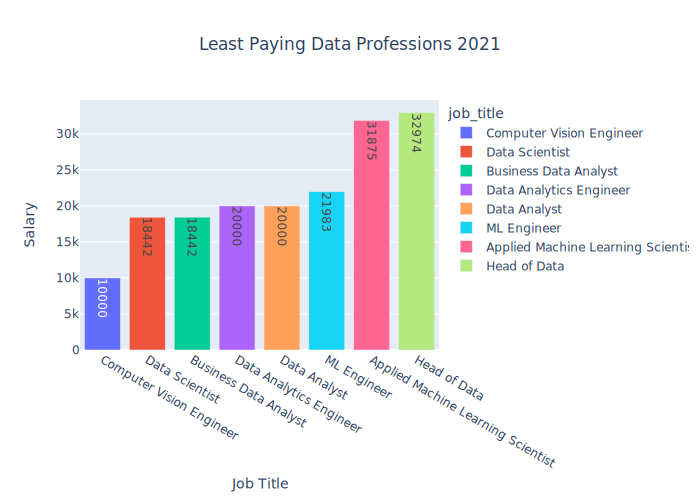

In [60]:
fig = (px.bar(paying_2022.sort_values(by="salary_in_usd", ascending=True)[:10].drop_duplicates(subset=["job_title"]), 
                            x="job_title", y="salary_in_usd", 
                            color="job_title", text="salary_in_usd", title="Least Paying Data Professions 2021")
                            ).update_layout(xaxis_title="Job Title", yaxis_title="Salary", title_x=0.5)
fig

- In 2022, a `Computer Vision Engineer` working in Luxembourg with entry-level experience in a medium-sized company earned the least.

From the last 3 observations, it can be deduced that position alone isn't the only factor dictating pay.

### What is the average earnings for the top 10 job titles?

In [61]:
average_earn = data.groupby(["job_title"]).mean()["salary_in_usd"].reset_index().sort_values(["salary_in_usd"], ascending=False).head(10)
average_earn["salary_in_usd"]  = average_earn["salary_in_usd"].round(decimals=2)
average_earn

,job_title,salary_in_usd
14,Data Analytics Lead,"405,000.0"
45,Principal Data Engineer,"328,333.33"
28,Financial Data Analyst,"275,000.0"
46,Principal Data Scientist,"215,242.43"
25,Director of Data Science,"195,074.0"
16,Data Architect,"177,873.91"
3,Applied Data Scientist,"175,655.0"
2,Analytics Engineer,"175,000.0"
23,Data Specialist,"165,000.0"
29,Head of Data,"160,162.6"


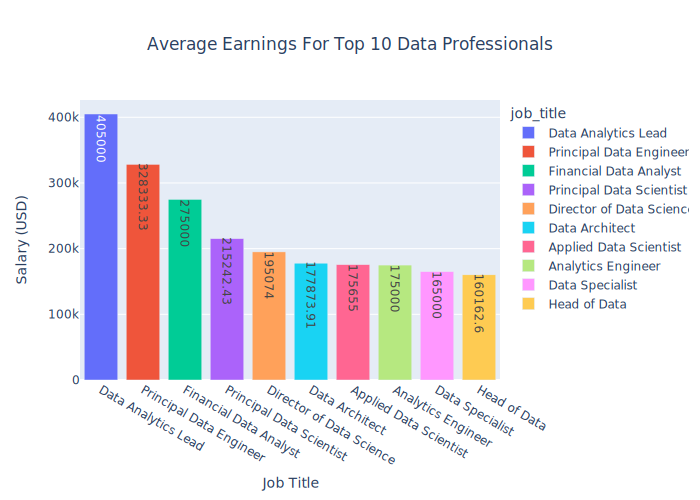

In [62]:
fig = (px.bar(average_earn, x="job_title", y="salary_in_usd", color="job_title",
                text="salary_in_usd", title="Average Earnings For Top 10 Data Professionals")
                ).update_layout(xaxis_title="Job Title", yaxis_title="Salary (USD)", title_x=0.5)
fig

### What are the average earnings per job title?

In [63]:
avg_earn = ((data.groupby("job_title").mean()["salary_in_usd"]
                        ).reset_index()
                    ).sort_values(["salary_in_usd"], ascending=False)
avg_earn["salary_in_usd"] = avg_earn["salary_in_usd"].round(decimals=2)
avg_earn.head(10)

,job_title,salary_in_usd
14,Data Analytics Lead,"405,000.0"
45,Principal Data Engineer,"328,333.33"
28,Financial Data Analyst,"275,000.0"
46,Principal Data Scientist,"215,242.43"
25,Director of Data Science,"195,074.0"
16,Data Architect,"177,873.91"
3,Applied Data Scientist,"175,655.0"
2,Analytics Engineer,"175,000.0"
23,Data Specialist,"165,000.0"
29,Head of Data,"160,162.6"


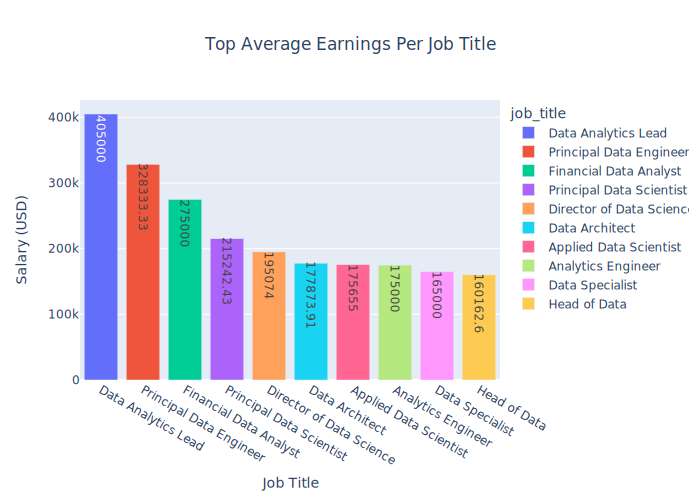

In [64]:
fig = px.bar(avg_earn.head(10), x="job_title", y="salary_in_usd",
                color="job_title", title="Top Average Earnings Per Job Title",
                text="salary_in_usd").update_layout(xaxis_title="Job Title",
                                        yaxis_title="Salary (USD)", title_x=.5)
fig

- The `Data Analytics Lead` role made it to the highest average earner.

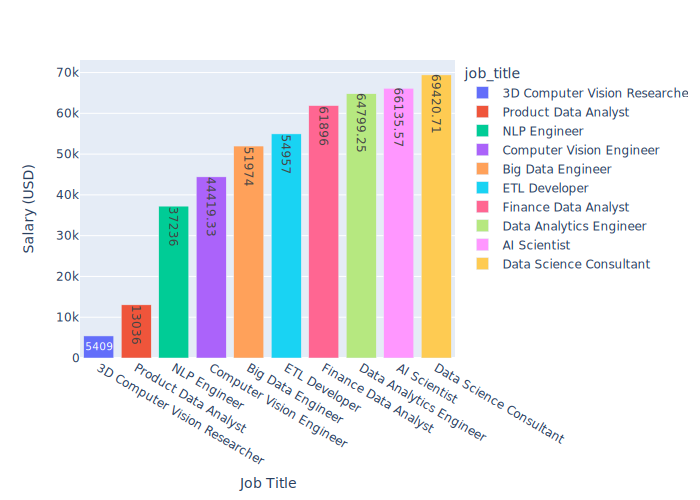

In [65]:
fig = (px.bar(avg_earn.tail(10).sort_values("salary_in_usd",ascending=True), x="job_title", y="salary_in_usd",
                                            text="salary_in_usd", color="job_title")
                                    .update_layout(
                                        xaxis_title="Job Title", yaxis_title="Salary (USD)", title_x=.5))
fig

- `3D Computer Vision Researcher` is the least average earning role.

### What is the average pay of job titles across major regions?

#### For Nigeria:

In [66]:
avg_region_ng = data[data.company_location == 'NG']
avg_region_ng = (avg_region_ng.groupby("job_title").mean()["salary_in_usd"]
                            .reset_index()
                        .sort_values("salary_in_usd",ascending=False)
                    )
avg_region_ng

,job_title,salary_in_usd
1,Data Scientist,"50,000.0"
0,Data Analyst,"10,000.0"


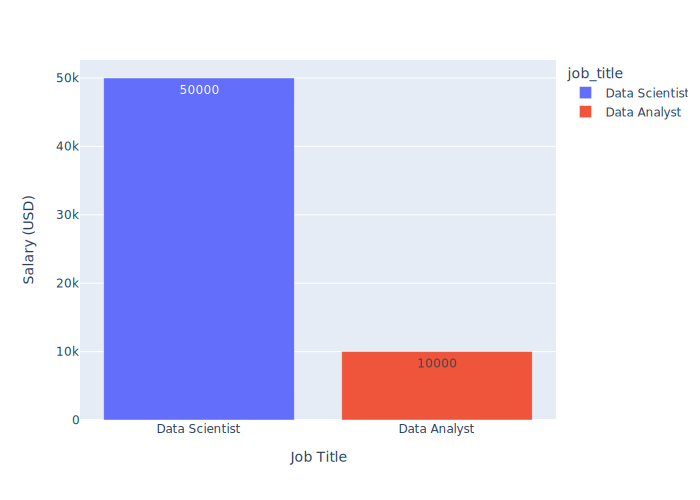

In [67]:
fig = (px.bar(avg_region_ng, x="job_title", y="salary_in_usd",
                                            text="salary_in_usd", color="job_title")
                                    .update_layout(
                                        xaxis_title="Job Title", yaxis_title="Salary (USD)", title_x=.5))
fig

- Data scientists earn 5 times more than data analysts in Nigeria.

#### For United States:

In [68]:
avg_region_us = data[data.company_location == 'US']
avg_region_us = (avg_region_us.groupby("job_title").mean()["salary_in_usd"]
                            .reset_index()
                        .sort_values("salary_in_usd", ascending=False)
                    ).round(decimals=2)

avg_region_us.head(10)

,job_title,salary_in_usd
12,Data Analytics Lead,"405,000.0"
35,Principal Data Engineer,"328,333.33"
22,Director of Data Science,"287,500.0"
23,Financial Data Analyst,"275,000.0"
29,ML Engineer,"263,000.0"
36,Principal Data Scientist,"255,500.0"
2,Applied Data Scientist,"238,000.0"
24,Head of Data,"217,500.0"
21,Director of Data Engineering,"200,000.0"
31,Machine Learning Infrastructure Engineer,"195,000.0"


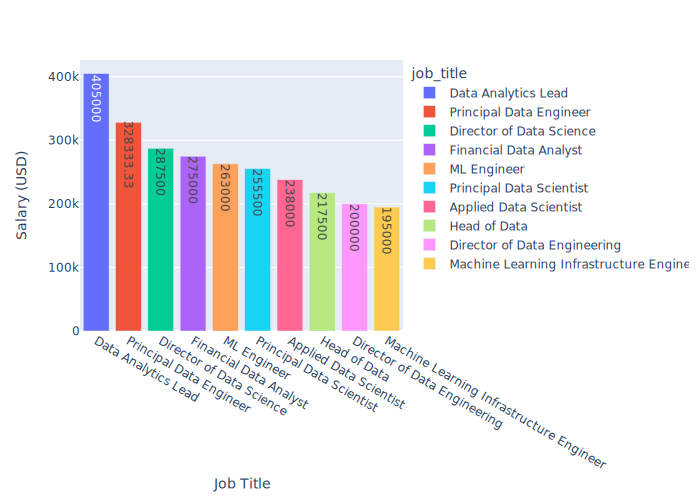

In [69]:
fig = (px.bar(avg_region_us.head(10), x="job_title", y="salary_in_usd",
                                            text="salary_in_usd", color="job_title")
                                    .update_layout(
                                        xaxis_title="Job Title", yaxis_title="Salary (USD)", title_x=.5))
fig

- `Data Analystics Lead` top the charts in the United States

#### Other Regions:

In [70]:
avg_region = data[data.company_location != 'US'][data.company_location != 'NG']
avg_region = (avg_region.groupby("job_title").mean()["salary_in_usd"]
                                .reset_index()
                            .sort_values("salary_in_usd", ascending=False)
                        ).round(decimals=2)
avg_region.head(10)

,job_title,salary_in_usd
36,Machine Learning Scientist,"165,666.67"
39,Principal Data Scientist,"161,565.67"
21,Director of Data Science,"158,103.6"
10,Computer Vision Software Engineer,"150,000.0"
13,Data Architect,"141,550.0"
18,Data Science Manager,"123,332.5"
24,Head of Data,"121,937.67"
35,Machine Learning Manager,"117,104.0"
28,Lead Data Engineer,"115,449.0"
20,Director of Data Engineering,"113,476.0"


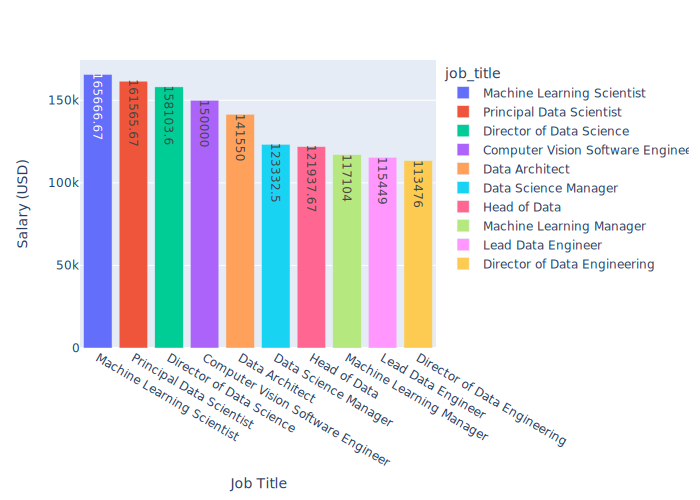

In [71]:
fig = (px.bar(avg_region.head(10), x="job_title", y="salary_in_usd",
                                            text="salary_in_usd", color="job_title")
                                    .update_layout(
                                        xaxis_title="Job Title", yaxis_title="Salary (USD)", title_x=.5))
fig

- Outside Nigeria and the United States, `Machine Learning Scientist` and `Principal Data Scientist` top the charts.

### Do companies in the US offer more salaries than other regions?

In [72]:
avg_merge = pd.merge(avg_region_us, avg_region[['job_title', 'salary_in_usd']], on='job_title',
                    how='left').dropna().rename(columns={'salary_in_usd_x':'salary_in_usd_us', 'salary_in_usd_y': 'salary_in_usd_world'}).head(10)
avg_merge

,job_title,salary_in_usd_us,salary_in_usd_world
2,Director of Data Science,"287,500.0","158,103.6"
4,ML Engineer,"263,000.0","44,756.0"
5,Principal Data Scientist,"255,500.0","161,565.67"
6,Applied Data Scientist,"238,000.0","82,137.5"
7,Head of Data,"217,500.0","121,937.67"
8,Director of Data Engineering,"200,000.0","113,476.0"
9,Machine Learning Infrastructure Engineer,"195,000.0","54,217.5"
10,Research Scientist,"191,000.0","81,692.67"
11,Lead Data Scientist,"190,000.0","77,785.0"
12,Data Architect,"185,945.89","141,550.0"


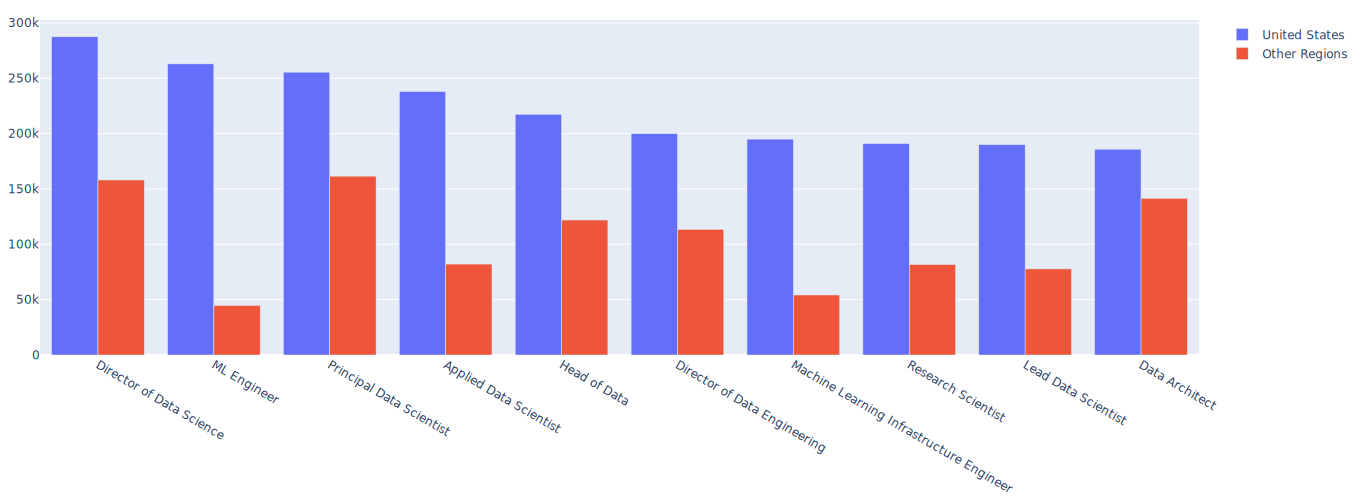

In [73]:
fig = go.Figure(data = [
    go.Bar(name="United States", x=avg_merge['job_title'].head(10), y=avg_merge['salary_in_usd_us'].head(10)),
    go.Bar(name="Other Regions", x=avg_merge['job_title'].head(10), y=avg_merge['salary_in_usd_world'].head(10))
])

fig.update_layout(barmode="group",
            margin=dict(l=20, r=20, t=20, b=20),
            width=1360)

- Companies in the United States offer more salary across all positions, in comparison to other regions.

### Are there any effects of experience level on salary?

In [74]:
xp_level = (data.groupby("experience_level").mean()["salary_in_usd"].reset_index()
                .sort_values("salary_in_usd", ascending=False)
            .round(decimals=2))
xp_level

,experience_level,salary_in_usd
1,Executive Level,"199,392.04"
3,Senior Level,"138,617.29"
2,Mid Level,"87,996.06"
0,Entry Level,"61,643.32"


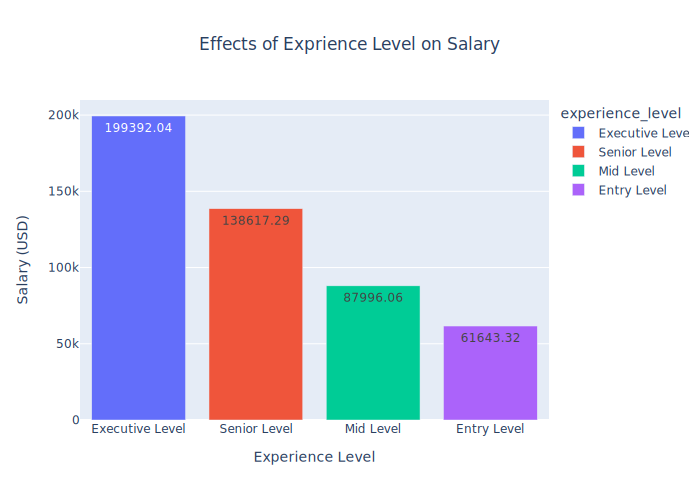

In [75]:
fig = (px.bar(xp_level, x='experience_level', y="salary_in_usd",
            text="salary_in_usd", color="experience_level", title="Effects of Exprience Level on Salary")
            .update_layout(xaxis_title="Experience Level", yaxis_title="Salary (USD)", title_x=.5))
fig

- Executive postions earn the most.
- Entry level postions earn the least.

### Are there any effects of company size on salary?

In [76]:
org_size = (data.groupby("company_size")
                    .mean()['salary_in_usd']
                        .reset_index()
                    .sort_values("salary_in_usd", ascending=False)
                .round(decimals=2))
org_size

,company_size,salary_in_usd
0,Large,"119,242.99"
1,Medium,"116,905.47"
2,Small,"77,632.67"


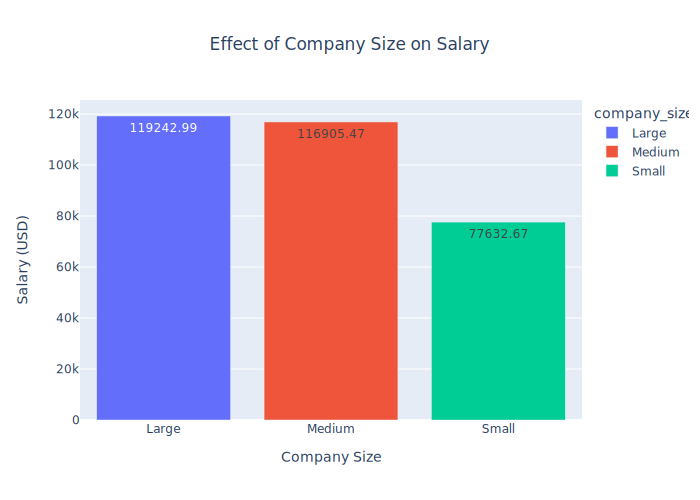

In [77]:
fig = (px.bar(org_size, x="company_size", y="salary_in_usd",
                    text="salary_in_usd", color="company_size", title="Effect of Company Size on Salary")
                .update_layout(xaxis_title="Company Size", yaxis_title="Salary (USD)", title_x=.5)
            )
fig

- The large companies pay more than the medium and small companies.

## Multivariate Analysis

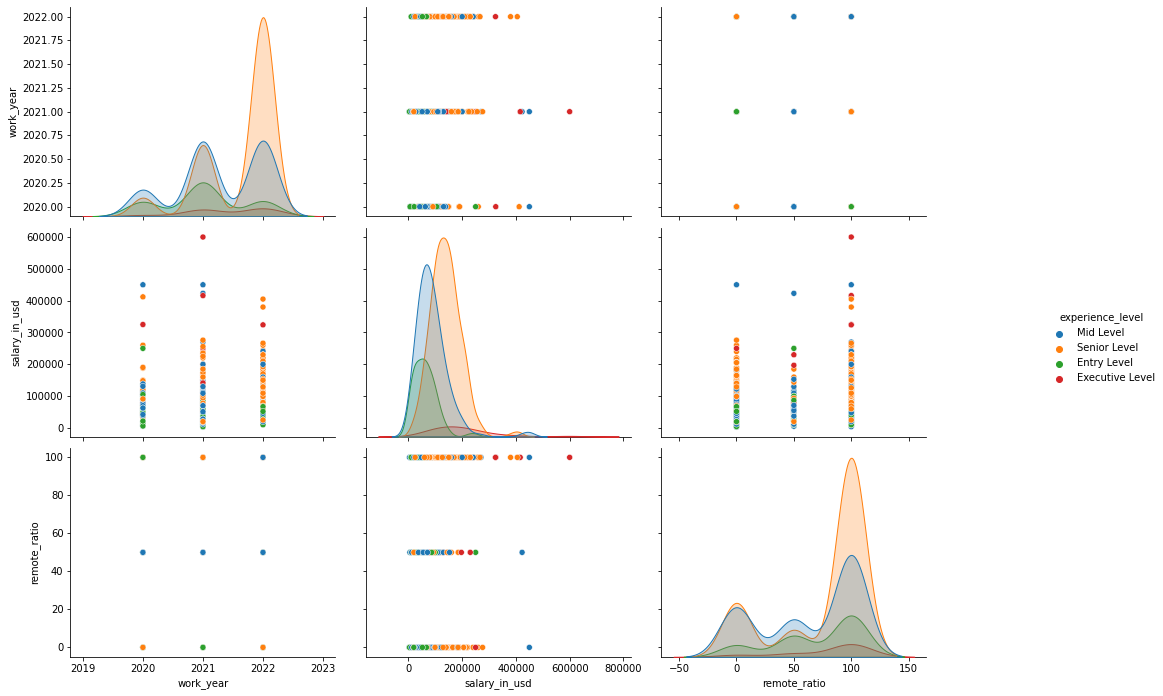

In [78]:
fig = sns.pairplot(data=data, hue="experience_level")
fig.fig.set_size_inches(17,10)

In [79]:
data_copy = data.copy()
le = LabelEncoder()

le.fit(data_copy.experience_level.drop_duplicates())
data_copy.experience_level = le.transform(data_copy.experience_level)

le.fit(data_copy.employment_type.drop_duplicates())
data_copy.employment_type = le.transform(data_copy.employment_type)

data_copy.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,Data Scientist,79833,DE,0,DE,Large
1,2020,3,2,Machine Learning Scientist,260000,JP,0,JP,Small
2,2020,3,2,Big Data Engineer,109024,GB,50,GB,Medium
3,2020,2,2,Product Data Analyst,20000,HN,0,HN,Small
4,2020,3,2,Machine Learning Engineer,150000,US,50,US,Large


<AxesSubplot:>

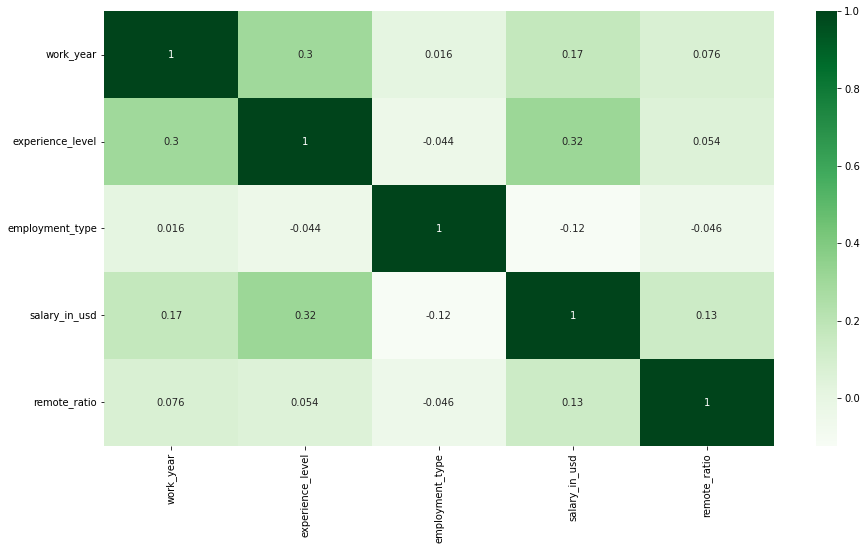

In [80]:
corr = data_copy.corr()
fig = sns.heatmap(corr, annot=True, cmap="Greens")
fig.figure.set_size_inches(15,8)
fig

- No strong correlation between variables.
- As earlier inferred, there is a slightly stronger correlation between experience level and salary.

In [81]:
data.groupby(["employment_type", "company_size"])["salary_in_usd"].sum().reset_index()

,employment_type,company_size,salary_in_usd
0,Contract,Large,370000
1,Contract,Medium,136875
2,Contract,Small,416000
3,Freelance,Large,20000
4,Freelance,Medium,112000
5,Freelance,Small,60000
6,Full-time,Large,23095415
7,Full-time,Medium,37734544
8,Full-time,Small,5889268
9,Part-time,Large,124698


<AxesSubplot:ylabel='salary_in_usd'>

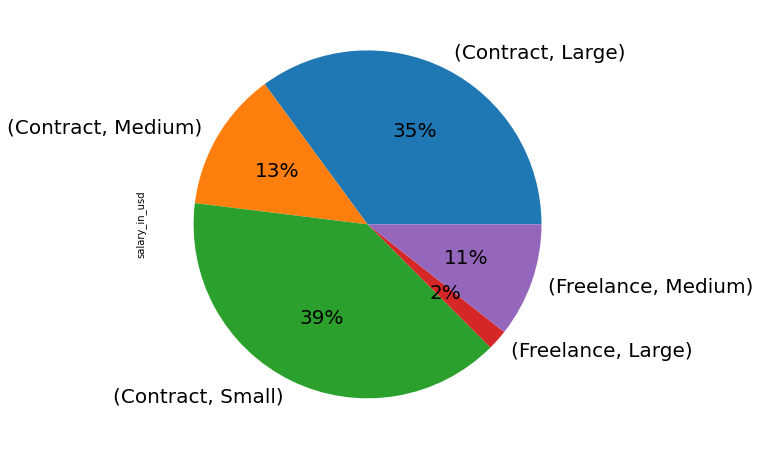

In [82]:
(data.groupby(["employment_type", "company_size"])["salary_in_usd"]
                        .sum().head(5)
                            .plot(kind='pie', 
                                y='salary_in_usd', 
                                figsize=(10,8), 
                                fontsize=20, autopct='%1.0f%%')
                    )

- Based on the salary, there are more contract workers in small companies, than large companies.

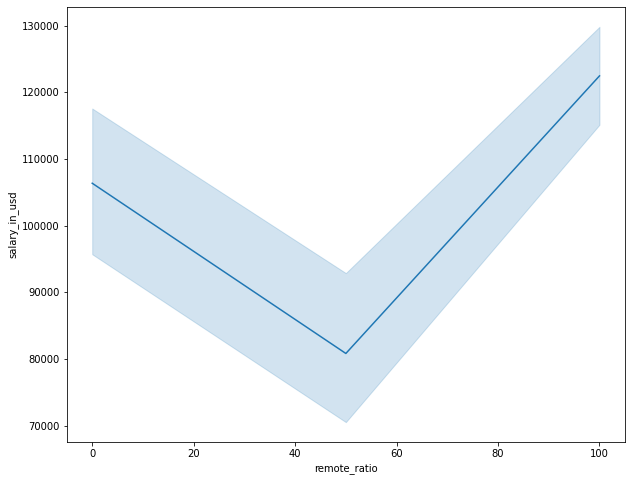

In [83]:
fig = sns.lineplot(data=data, x='remote_ratio', y="salary_in_usd")
fig.figure.set_size_inches(10,8)

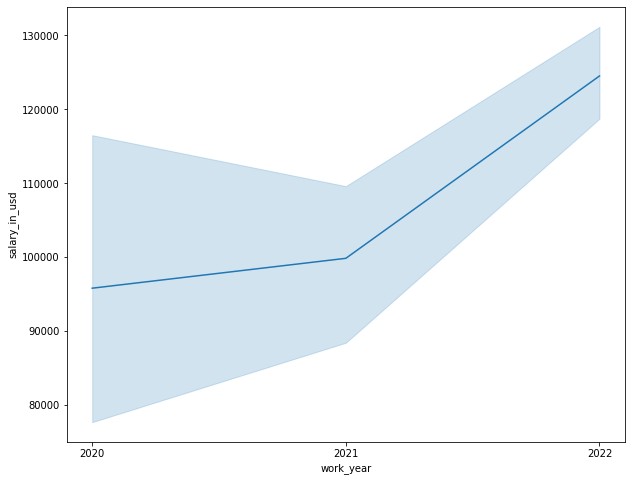

In [84]:
fig = sns.lineplot(data=data, x='work_year', y="salary_in_usd")
fig.set_xticks([2020, 2021, 2022])
fig.figure.set_size_inches(10,8)

- Salaries increases over time.

## Conclusion